# Практическое занятие в рамках Осенней ИТ-школы ОИЯИ-2024

##  Матричные вычисления: теория и практика

__Туториал проводят:__  _Калиновский Ю.Л.,_

_Аникина А.И., Башашин М.В., Бежанян Т.Ж., Беляков Д.В.,  Воронцов А.С., Зуев М.И.,  Кокаев Д.А., Кокорев А.А., Нечаевский А.В., Пряхина Д.И., Рахмонова А.Р., Стрельцова О.И., Шадмехри С.А., Хмелев А.В._

__В практическом занятии использовались материалы:__
* _Майк Икс Коэн_. «Прикладная линейная алгебра для исследователей данных. С примерамии упражнениями на Python», ДМК Пресс, 2023
* _Рашка Себастьян, Мирджалили Вахид_. «Python и машинное обучение: машинное и глубокое обучение с использованием Python, scikit-learn и TensorFlow».3-е изд. 2020

In [1]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd
# use seaborn plotting defaults
import seaborn as sns; sns.set()
sns.set(style="whitegrid")
# use sklearn 
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, Label

## Ковариационная матрица
__Многомерное нормальное распределение:__

Генерация случайных выборок из многомерного нормального распределения выполняется с помощью [функции Numpy](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html): 
```python
random.multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-8)
```
Сгенерируем 100 векторов из двумерного нормального распределения с задаными средним  и ковариационной матрицей.

In [3]:
mean = (0, 0)
cov = np.array([(5, 0), (0, 1)])
cov

array([[5, 0],
       [0, 1]])

In [4]:
mvnd = np.random.multivariate_normal(mean, cov, size=100)

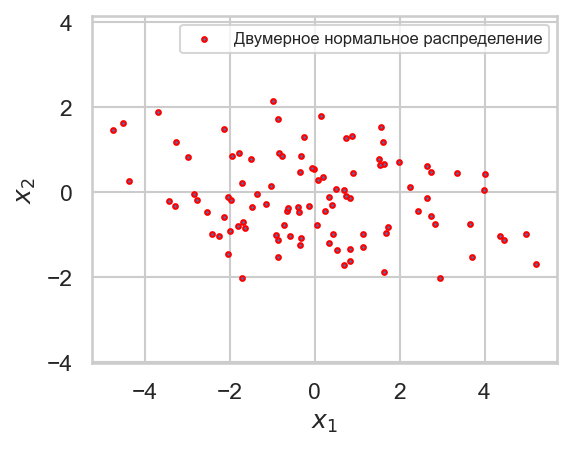

In [5]:
plt.figure(figsize=(4, 3), dpi=150)
plt.scatter(mvnd[:,0], mvnd[:,1], edgecolor="red", s=5,
            label='Двумерное нормальное распределение')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.legend(loc='upper right', fontsize=8)
plt.axis('equal')
plt.show()

In [6]:
@interact(mean_x1=(-10.0, 10.0, 1.), 
             mean_x2=(-10.0, 10.0, 1.), 
             cov_11=(0, 10, 1.),
             cov_12=(0, 10, 1.),
             cov_22=(0, 10, 1.)
            )
def show_ND(mean_x1=(0.0), 
             mean_x2=(0.0), 
             cov_11=(5.0),
             cov_12=(0.0),
             cov_22=(1.)
            ):
    mean = (mean_x1, mean_x2)
    cov = np.array([[cov_11, cov_12], [cov_12, cov_22]]) 
    # For small eigenvalue (See https://stackoverflow.com/questions/41515522/numpy-positive-semi-definite-warning)
    min_eig = np.min(np.real(np.linalg.eigvals(cov)))
    if min_eig < 0:
        cov -= 10*min_eig * np.eye(*cov.shape)
    #
    mvnd = np.random.multivariate_normal(mean, cov, size=100)
    fig = plt.figure(figsize=(4, 4))
    #plot
  
    plt.scatter(mvnd[:,0], mvnd[:,1], edgecolor="red", s=10, label="Двумерное нормальное распределение");
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")
    plt.axis('equal')
    plt.legend(fontsize=8)
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='mean_x1', max=10.0, min=-10.0, step=1.0), FloatSlide…

__Ковариационная матрица для многомерных данных__

Пусть $X$ - это матрица «объекты-признаки» (каждый столбец - это признак), в которой проведено центрирование по каждому признаку.

Матричное уравнение для ковариационой матрицы:

$$ С = \frac{1}{n-1}X^TX $$

## Корреляция (correlation)

__Коэффициент корреляции Пирсона:__

$$ r_{XY} = \frac{(X,Y)}{\sigma_X \sigma_Y} = \frac{\sum_{i=1}^{N} (x_i -\bar{x}) (y_i -\bar{y})}
{\sqrt{\sum_{i=1}^{N} (x_i -\bar{x})^2 \sum_{i=1}^{N} (y_i -\bar{y})^2 }} $$ 
__Генерация случайной задачи регрессии__

Подробное описание в библиотеке [sklearn.datasets.make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)
```python
sklearn.datasets.make_regression(n_samples=100, n_features=100, *, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)[source]
```

In [7]:
B = 1

In [8]:
# generate regression dataset
X, y, coef = make_regression(n_samples=150, n_features=1, bias=B, noise=0.9, coef=True,effective_rank=True, tail_strength=0 , random_state=2)

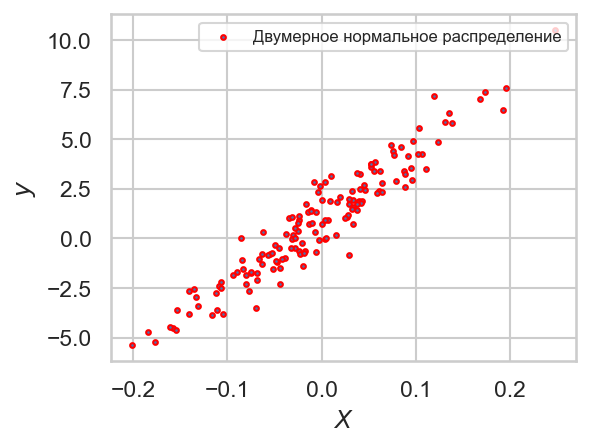

In [9]:
%matplotlib inline

plt.figure(figsize=(4, 3), dpi=150)
plt.scatter(X, y, edgecolor="red", s=5,
            label='Двумерное нормальное распределение')
plt.xlabel("$X$")
plt.ylabel("$y$")

plt.legend(loc='upper right', fontsize=8)
plt.show()

In [10]:
np.corrcoef(X[:,0],(y.reshape(X.shape[0],1))[:,0])

array([[1.        , 0.95454891],
       [0.95454891, 1.        ]])

In [11]:
X[:,0].shape

(150,)

In [12]:
def get_correlation_coeffitient(n_size, X, y): # wrong
    x = X[:,0]
    x_mean = np.mean(x[0])
    y_mean = np.mean(y)
    upper_sum = 0.0
    lower_sum_1 = 0.0
    lower_sum_2 = 0.0
    for i in range(n_size):
        upper_sum += (x[i] - x_mean) * (y[i] - y_mean)
        lower_sum_1 += (x[i] - x_mean) * (x[i] - x_mean)
        lower_sum_2 = (y[i] - y_mean) * (y[i] - y_mean)

    return upper_sum / np.sqrt(lower_sum_1 * lower_sum_2)

In [13]:
get_correlation_coeffitient(150, X, y)

13.180406751188022

In [14]:

@interact
def show_reg(noise=(0.0, 50.0, 1.), B=(-2, 2, 0.1)):
    X, y, coef = make_regression(n_samples=150, n_features=1, bias=B, noise=noise, coef=True,effective_rank=True, tail_strength=0 , random_state=2)
    fig = plt.figure(figsize=(7, 7))
    #correlation
    X2 = np.zeros((X.shape[0], 2))
    X2[:,0] = X[:,0]
    X2[:,1] = (y.reshape(X.shape[0],1))[:,0]
    c = np.corrcoef(X2[:,0],X2[:,1])
    print (c)
  
    plt.scatter(X, y, edgecolor="red", s=50, label="A random regression problem");
    plt.plot(X,coef*X+B,color='blue',linewidth=1, label="Liner model")
    plt.xlabel("X")
    plt.ylabel("y")
    
    plt.legend(fontsize=8)
    t_x = X2[:,0].min()
    t_y = X2[:,1].min()
    plt.text(t_x, t_y, r'Corr= %f'%c[0,1], fontsize=11, bbox=dict(facecolor='blue', alpha=0.1))
    plt.show()

interactive(children=(FloatSlider(value=25.0, description='noise', max=50.0, step=1.0), FloatSlider(value=0.0,…

## Метод главных компонент (Principal Component Analysis, __PCA__)
1. Реализация напрямую
2. Реализация средствами _sklearn_

Реализуем PCA на примере набора данных из [sklearn.dataset](https://scikit-learn.org/1.5/api/sklearn.datasets.html) [Iris](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) 


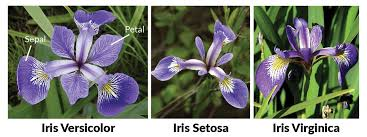

In [15]:
from sklearn.datasets import load_iris

In [16]:
X, y = load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [17]:
data = load_iris(as_frame=True)
df_iris = pd.DataFrame(data=data.data, columns=data.feature_names)
df_iris['target'] = pd.Series(data.target)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


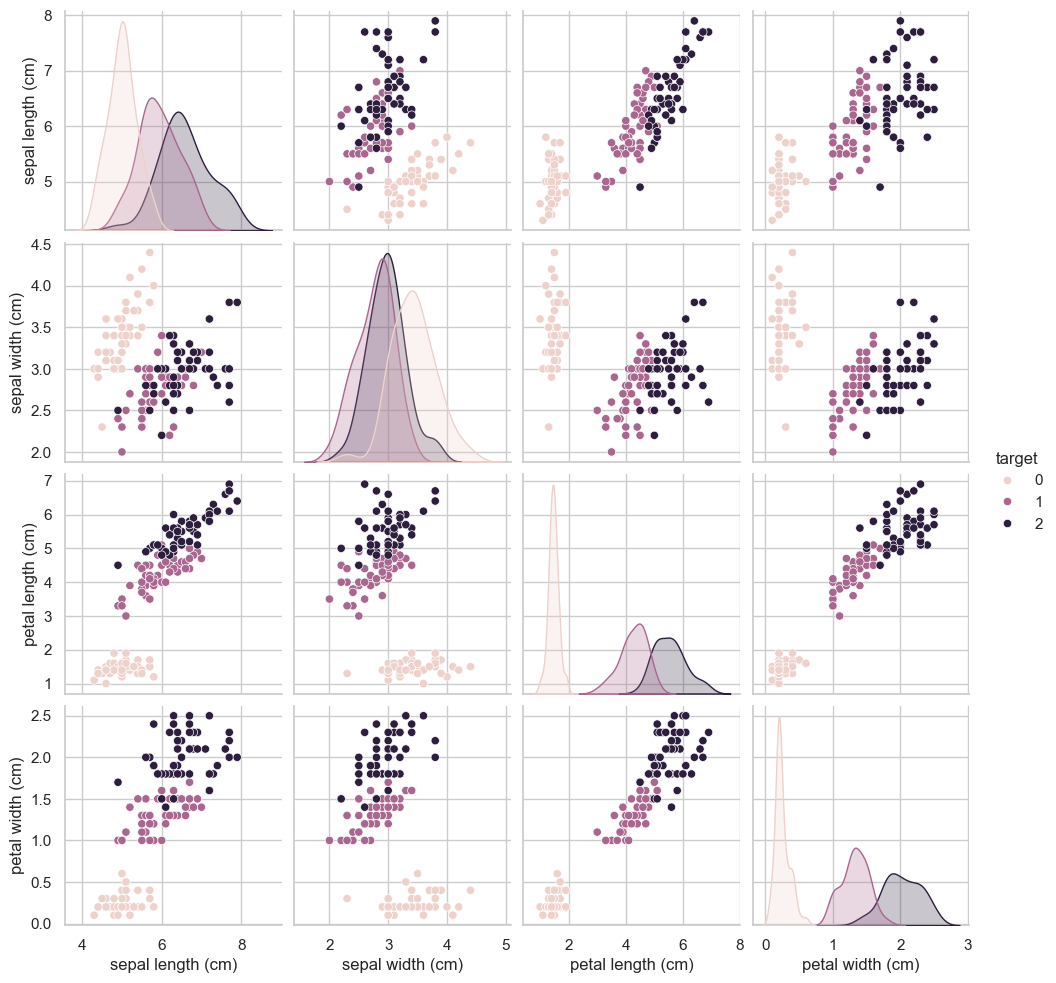

In [18]:
%matplotlib inline
sns.pairplot(df_iris, hue='target')
plt.show()

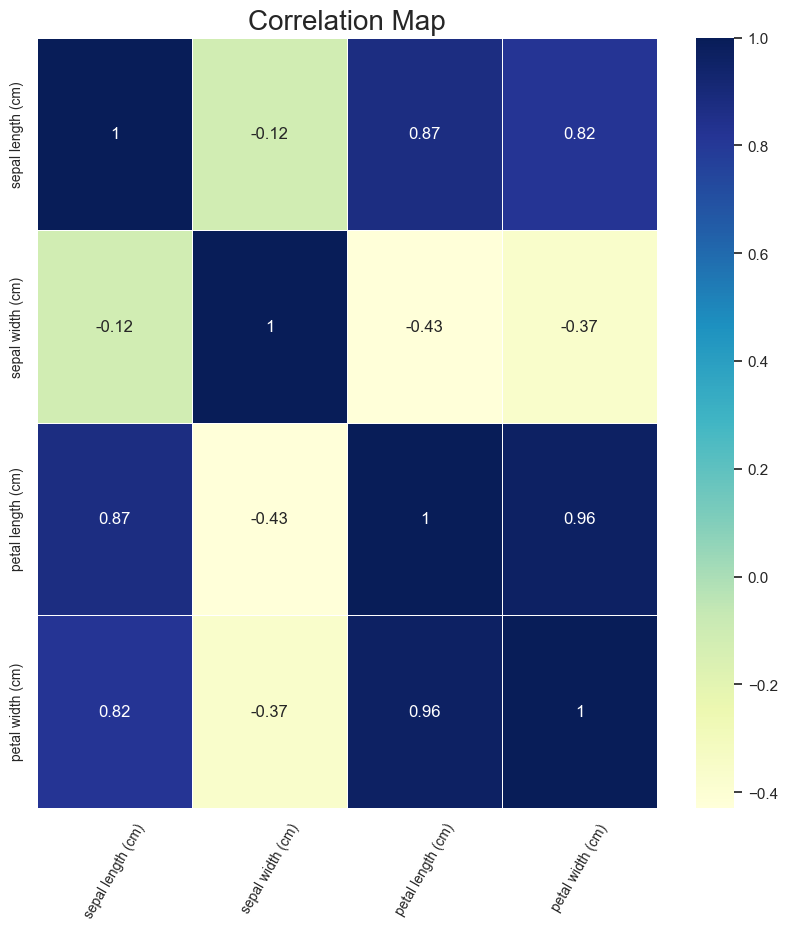

In [19]:
def correlated_map(dataframe, plot=False):
    corr = dataframe.corr()
    if plot:
        sns.set(rc={'figure.figsize': (10, 10)})
        sns.heatmap(corr, cmap="YlGnBu", annot=True, linewidths=.7)
        plt.xticks(rotation=60, size=10)
        plt.yticks(size=10)
        plt.title('Correlation Map', size=20)
        plt.show()

correlated_map(df_iris.iloc[:,:4], plot=True)

__Разделим даные на обучающее и тестовое подмножества__ 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [21]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

### I. Собственная реализация


#### __1. Центрирование признаков__

In [22]:
std_scaler = StandardScaler(with_std=False)  # только центрируем по столбцам
X_train_cnt = std_scaler.fit_transform(X_train)
X_test_cnt = std_scaler.fit_transform(X_test)

In [23]:
X_train_cnt.mean(axis=0)

array([-6.68248525e-16, -7.57066367e-16, -5.49824736e-17, -4.31400947e-16])

In [24]:
X_train_cnt.std(axis=0)

array([0.84052138, 0.4168775 , 1.78012204, 0.77931885])

#### __2.1 Составление ковариационной матрицы__

In [25]:
cov_matrix = (X_train_cnt.T) @ (X_train_cnt)/(X_train_cnt.shape[0]-1)
cov_matrix

array([[ 0.71326923, -0.03538462,  1.34019231,  0.54403846],
       [-0.03538462,  0.17545788, -0.27069597, -0.09569139],
       [ 1.34019231, -0.27069597,  3.19930403,  1.34978938],
       [ 0.54403846, -0.09569139,  1.34978938,  0.61317766]])

#### __2.2 Найдем собственые векторы и собственые значения ковариационой матрицы__

Воспользуемся методом [numpy.linalg.eig]() из модуля numpy.linalg
```python
numpy.linalg.eig
linalg.eig(a)
```
Compute the eigenvalues and right eigenvectors of a square array.

In [26]:
cov_matrix2 = np.cov(X_train_cnt, rowvar=False)
cov_matrix2

array([[ 0.71326923, -0.03538462,  1.34019231,  0.54403846],
       [-0.03538462,  0.17545788, -0.27069597, -0.09569139],
       [ 1.34019231, -0.27069597,  3.19930403,  1.34978938],
       [ 0.54403846, -0.09569139,  1.34978938,  0.61317766]])

#### __3. Найдем собственные векторы и собственные значения ковариационой матрицы__

Воспользуемся методом [numpy.linalg.eig]() из модуля numpy.linalg
```python
numpy.linalg.eig
linalg.eig(a)
```
Compute the eigenvalues and right eigenvectors of a square array.

In [29]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvectors, eigenvalues

(array([[ 0.36760197, -0.63470116, -0.58983791,  0.33780832],
        [-0.06649071, -0.7468054 ,  0.58428977, -0.31059   ],
        [ 0.85410056,  0.17634312,  0.06477864, -0.48499389],
        [ 0.36188398,  0.09131939,  0.55362481,  0.74444632]]),
 array([4.36909984, 0.22100548, 0.09049788, 0.0206056 ]))

In [30]:
eig_v_sorted = np.array(sorted(eigenvalues, reverse=True))
eig_v_sorted

array([4.36909984, 0.22100548, 0.09049788, 0.0206056 ])

#### __Коэфициент объясненной дисперсии__

$$ K_j= \frac{\lambda_j }{\sum_{i=1}^{d}\lambda_i }. $$ 

In [31]:
K_sum = eig_v_sorted.sum()
K_sum

4.70120879120879

In [32]:
K = eig_v_sorted / K_sum
K

array([0.92935669, 0.04701035, 0.01924992, 0.00438304])

In [33]:
x_indx = np.arange(len(K)) + 1
x_indx

array([1, 2, 3, 4])

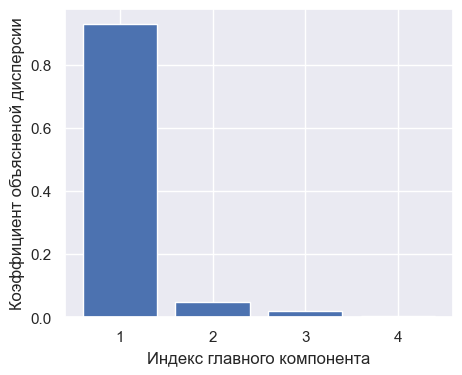

In [34]:
plt.figure(figsize=(5, 4), dpi=100)
plt.bar(x_indx, K)
plt.xlabel("Индекс главного компонента")
plt.ylabel("Коэффициент объясненой дисперсии")

plt.show()

#### __4. Сортируем пары "собственный вектор - собственные значения"__

In [35]:
eigen_pairs = [ ( np.abs(eigenvalues[i]), eigenvectors[:,i] )
              for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

#### __5. Выбирем главные компоненты и преобразуем матрицу "объектов-признаков в новое подпространство признаков"__
* Создаем матрицу преобразований из 2-х собственых векторов $W$
* Выполняем преобразование
  $$ X' = XW.$$

In [36]:
# матрица
W = np.hstack((eigen_pairs[0][1][:,np.newaxis],
               eigen_pairs[1][1][:,np.newaxis]))
W


array([[ 0.36760197, -0.63470116],
       [-0.06649071, -0.7468054 ],
       [ 0.85410056,  0.17634312],
       [ 0.36188398,  0.09131939]])

In [37]:
# преобразование
X_train_PCA = X_train_cnt.dot(W)

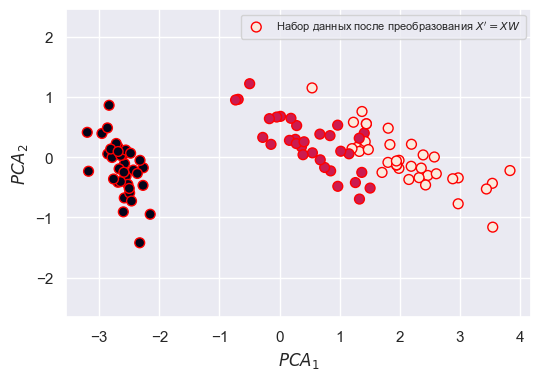

In [38]:
plt.figure(figsize=(6, 4), dpi=100)
plt.scatter(X_train_PCA[:,0], X_train_PCA[:,1],  c = y_train,edgecolor="red", s=50, label="Набор данных после преобразования $X'=XW$");
plt.xlabel("$PCA_1$")
plt.ylabel("$PCA_2$")
plt.legend(fontsize=8)
plt.axis('equal')
plt.show()

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=2)
X_train_PCA2 =  pca.fit_transform(X_train_cnt);
X_train_PCA2.shape

(105, 2)

In [41]:
X_test_PCA2 = pca.transform(X_test_cnt)

In [42]:
W = pca.components_
print(W.T)

[[ 0.36760197  0.63470116]
 [-0.06649071  0.7468054 ]
 [ 0.85410056 -0.17634312]
 [ 0.36188398 -0.09131939]]


In [43]:
 pca.explained_variance_ratio_

array([0.92935669, 0.04701035])

In [44]:
pca.explained_variance_ratio_

array([0.92935669, 0.04701035])

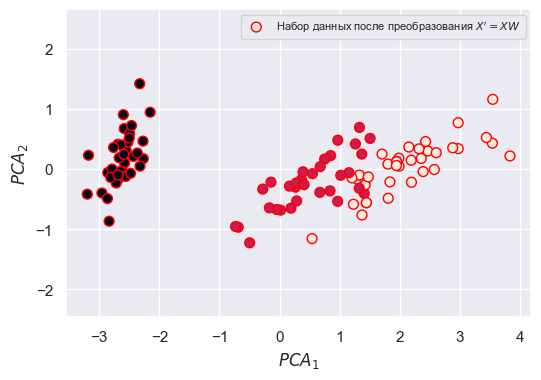

In [46]:
plt.figure(figsize=(6, 4), dpi=100)
plt.scatter(X_train_PCA2[:,0], X_train_PCA2[:,1],  c = y_train,edgecolor="red", s=50, label="Набор данных после преобразования $X'=XW$");
plt.xlabel("$PCA_1$")
plt.ylabel("$PCA_2$")
plt.legend(fontsize=8)
plt.axis('equal')
plt.show()

# Самостоятельное задание

Создать и обучить модель логистической регрессии и получить classification report и визуализировать границу принятия решений

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

In [69]:
X_test_PCA2 =  pca.fit_transform(X_test_cnt);

In [70]:
model = LogisticRegression()
model.fit(X_train_PCA2, y_train)

LogisticRegression()

In [72]:
training_predictions = model.predict(X_train_PCA2)
test_prediction = model.predict(X_test_PCA2)

In [73]:
accuracy_score(y_test, test_prediction)

0.9777777777777777

In [74]:
print("Precision, Recall, Confusion matrix, in training\n")
print(metrics.classification_report(y_train, training_predictions, digits=3))

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        36
           1      0.938     0.938     0.938        32
           2      0.946     0.946     0.946        37

    accuracy                          0.962       105
   macro avg      0.961     0.961     0.961       105
weighted avg      0.962     0.962     0.962       105



In [75]:
x_min, x_max = X_train_PCA2[:, 0].min() - 1, X_train_PCA2[:, 0].max() + 1
y_min, y_max = X_train_PCA2[:, 1].min() - 1, X_train_PCA2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

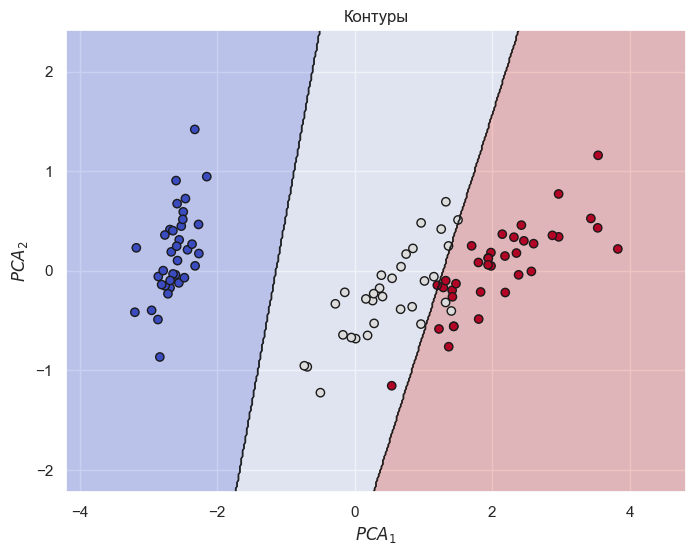

In [80]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.contour(xx, yy, Z, colors='k', linewidths=0.5)
plt.scatter(X_train_PCA2[:, 0], X_train_PCA2[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel("$PCA_1$")
plt.ylabel("$PCA_2$")
plt.title('Контуры')

plt.show()

In [82]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [83]:
model = SVC(kernel='rbf', gamma='auto')  # Используем нелинейное RBF ядро
model.fit(X_train_PCA2, y_train)

SVC(gamma='auto')

In [84]:
x_min, x_max = X_train_PCA2[:, 0].min() - 1, X_train_PCA2[:, 0].max() + 1
y_min, y_max = X_train_PCA2[:, 1].min() - 1, X_train_PCA2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

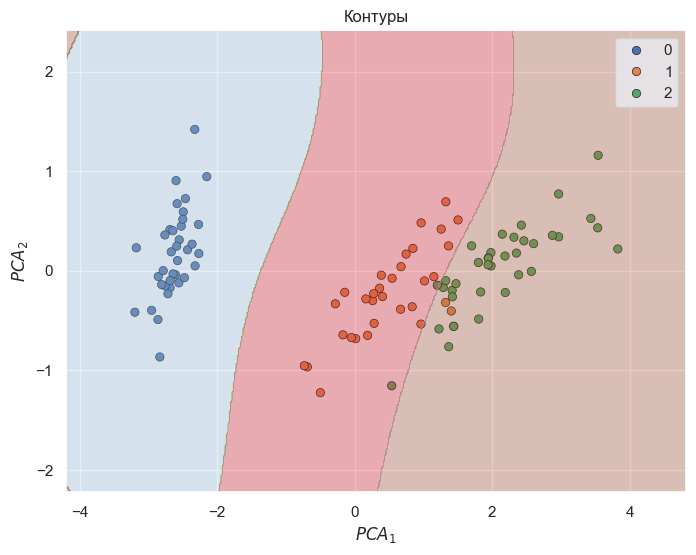

In [86]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_PCA2[:, 0], y=X_train_PCA2[:, 1], hue=y_train, palette="deep", edgecolor='k')
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.xlabel("$PCA_1$")
plt.ylabel("$PCA_2$")
plt.title('Контуры')
plt.show()